<a href="https://colab.research.google.com/github/sdithiney/EDA_SPARK_FUND_ANALYSIS/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on EDA Spark Funds <br>
# Plotting of Graph of each analysis is uncluded in the checkpoints related to it

### Importing Files

In [119]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
uploaded = files.upload()

In [120]:
companies = pd.read_csv('companies.csv', encoding = "unicode_escape")

In [121]:
rounds2 = pd.read_csv("rounds2.csv", encoding = "unicode_escape")

In [122]:
mapping = pd.read_csv("mapping.csv", encoding = "unicode_escape")

In [123]:
companies.shape

(13558, 10)

In [124]:
rounds2.shape

(114949, 6)

In [125]:
mapping.shape

(688, 10)

### Converting Companies and round2 company permalink in an encoded format so that they can be readable

In [126]:
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [127]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

### Checkpoint 1

In [128]:
# Convert companies permalink in upper case
companies.permalink = companies.permalink.apply(lambda x : x.upper())

In [129]:
# Convert rounds2 company_permalink in upper case
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : x.upper()) 

In [130]:
# How many unique companies are present in rounds2?
len(companies.permalink)

13558

In [131]:
# How many unique companies are present in companies?
len(rounds2.company_permalink.value_counts())

66368

In [132]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no:
companies.permalink.isin(rounds2.company_permalink).value_counts()

True    13558
Name: permalink, dtype: int64

##### Here we can see that all the companies permalink is avaliable in rounds2 so we can say <b>No</b>.

#### Merging Companies data and Rounds2 in Master Frame and cleaning Data

In [133]:
master_frame = pd.merge(rounds2,companies, how="left" , left_on=rounds2.company_permalink, right_on=companies.permalink)

In [134]:
master_frame

,key_0,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114945,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114946,/ORGANIZATION/ERON,/ORGANIZATION/ERON,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114947,/ORGANIZATION/ASYS-2,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# Lets have a look of the datatypes
master_frame.dtypes

key_0                       object
company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
dtype: object

In [136]:
# Apart from raised_amount_usd all the data types are in object, we will convert them in str further

In [137]:
# checking for null values in the master frame

master_frame.isnull().sum()

key_0                          0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                  90945
name                       90945
homepage_url               92228
category_list              91612
status                     90946
country_code               92544
state_code                 93020
region                     92867
city                       92867
founded_at                 95264
dtype: int64

In [138]:
# lets look at the data row wise
master_frame.isnull().sum(1)

0          1
1          1
2          1
3          5
4          0
          ..
114944    11
114945    11
114946    11
114947    11
114948    11
Length: 114949, dtype: int64

In [139]:
# let's have some top and bottom reccords
master_frame[master_frame.isnull().sum(1)==0]

,key_0,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
10,/ORGANIZATION/0XDATA,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/ORGANIZATION/0XDATA,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
28,/ORGANIZATION/10-MINUTES-WITH,/ORGANIZATION/10-MINUTES-WITH,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/ORGANIZATION/1000MEMORIES,/ORGANIZATION/1000MEMORIES,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23997,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/72d440be1e4243621dc27917b915014f,venture,B,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012
23998,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,C,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012
23999,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,C,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012
24000,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,B,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012


In [140]:
# we can see that only 22044 rows are avaliable in the master_frame that do not have a null value
# So we need to clean data. Let's have a look column wise, how much data % is null
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                       0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                  79.12
name                       79.12
homepage_url               80.23
category_list              79.70
status                     79.12
country_code               80.51
state_code                 80.92
region                     80.79
city                       80.79
founded_at                 82.88
dtype: float64

In [141]:
# Here if we focus on funding_round_code. we find that 72% of the column data is missing so it will be better to remove this column
master_frame = master_frame.drop('funding_round_code',axis=1) 

In [142]:
# let's check the data row wise which doesn't have any null value
master_frame[master_frame.isnull().sum(1)==0]

,key_0,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
2,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/ORGANIZATION/0XDATA,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23998,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012
23999,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012
24000,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012
24001,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/e0ed9bb17ba23fa762787fba3aa9bf60,venture,18-04-2012,16000000.0,/ORGANIZATION/COURSERA,Coursera,http://www.coursera.org,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2012


In [143]:
# Now we have 71580 rows that doesn't contain any null values, Lets check the percentage of the rows avaliable
round(100*len(master_frame[master_frame.isnull().sum(1)==0])/len(master_frame),2)

13.18

In [144]:
# We have 62.27 % of Data which means if we remove all rows with null values we will loose at least 37.73% of that which is also not good
# let's have a look on other column null value percentages
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                       0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                  79.12
name                       79.12
homepage_url               80.23
category_list              79.70
status                     79.12
country_code               80.51
state_code                 80.92
region                     80.79
city                       80.79
founded_at                 82.88
dtype: float64

In [145]:
# While going through the columns we can analyse that we don't need some columns like homepage_url, founded_at, state_code, region, city.
# So let's remove all those column's
master_frame = master_frame.drop(['homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)

In [146]:
# Now let's check the null data percentage column wise
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                       0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                  79.12
name                       79.12
category_list              79.70
status                     79.12
country_code               80.51
dtype: float64

In [147]:
# We can now look the data row wise
master_frame[master_frame.isnull().sum(axis=1)==0]

,key_0,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
2,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,Games,operating,HKG
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
...,...,...,...,...,...,...,...,...,...,...,...
23998,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
23999,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
24000,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
24001,/ORGANIZATION/COURSERA,/ORGANIZATION/COURSERA,/funding-round/e0ed9bb17ba23fa762787fba3aa9bf60,venture,18-04-2012,16000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA


In [148]:
# We can clearly see that now we have 88528 rows which don't have any null values
# let's see the percentage of the avaliable rows with not null values
round(100*len(master_frame[master_frame.isnull().sum(1)==0])/len(master_frame),2)

16.38

In [149]:
# If we observe the data we can see that we have two different column in the master_frame with same value, they are company_permalink and permalink. Let's drop one column
master_frame = master_frame.drop('company_permalink', axis=1)

In [150]:
# Now We have 77.02 % of data and we are ok with it so we will be replacing that not null 
# row values in the master frame and discarding the rows with null values 

master_frame = master_frame[master_frame.isnull().sum(axis=1)==0]

In [151]:
# Let's see the % of null data column wise
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                      0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [152]:
# Now we have 0.0% null values in the data frame which means our dataset doesn't contain any null values
# Move to the next question

# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2
# data frame. Name the merged frame master_frame. How many observations are present in master_frame?

# Observations after cleaning data : 
master_frame.shape

(18829, 10)

### Checkpoint 2 - Goal 1 , Investment Type Analysis

In [153]:
# Lets see the data type of the funding_round_type
master_frame.dtypes

key_0                       object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [154]:
# Change the dtype of funding_round_type to str
master_frame.funding_round_type = master_frame.funding_round_type.astype('str')

In [155]:
# check for the types of funding_round_type
master_frame.funding_round_type.value_counts()

venture                  10658
seed                      3962
debt_financing            1549
angel                      797
grant                      416
private_equity             392
undisclosed                287
convertible_note           258
equity_crowdfunding        232
post_ipo_equity            158
product_crowdfunding        57
post_ipo_debt               43
non_equity_assistance       12
secondary_market             8
Name: funding_round_type, dtype: int64

In [156]:
# Lets see the comopanies with four funding_round_type 
master_frame[(master_frame.funding_round_type=='venture') | (master_frame.funding_round_type=='seed') | (master_frame.funding_round_type=='angel') | (master_frame.funding_round_type=='private_equity')]

,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
...,...,...,...,...,...,...,...,...,...,...
23998,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
23999,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
24000,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
24001,/ORGANIZATION/COURSERA,/funding-round/e0ed9bb17ba23fa762787fba3aa9bf60,venture,18-04-2012,16000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA


In [157]:
# assign the above output to the main_frame
main_frame = master_frame[(master_frame.funding_round_type=='venture') | 
                          (master_frame.funding_round_type=='seed') | 
                          (master_frame.funding_round_type=='angel') | 
                          (master_frame.funding_round_type=='private_equity')]

In [158]:
main_frame

,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
...,...,...,...,...,...,...,...,...,...,...
23998,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
23999,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
24000,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
24001,/ORGANIZATION/COURSERA,/funding-round/e0ed9bb17ba23fa762787fba3aa9bf60,venture,18-04-2012,16000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA


In [159]:
# check for media and mean of each funding_round_type

main_frame.groupby("funding_round_type").mean()

,raised_amount_usd
funding_round_type,
angel,9.496225e+05
private_equity,7.629706e+07
seed,8.139664e+05
venture,1.099541e+07


In [160]:
# this mean is not readable so convert the above result in readable form
round(main_frame.groupby("funding_round_type").mean(),2)

,raised_amount_usd
funding_round_type,
angel,949622.54
private_equity,76297055.48
seed,813966.39
venture,10995412.44


In [161]:
master_frame.dtypes

key_0                       object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [162]:
# let convert the raised_amount_usd to in million figures
master_frame.raised_amount_usd = master_frame.raised_amount_usd.apply(lambda x: round(x/1000000,2))
master_frame.raised_amount_usd

0        10.00
2         0.70
4         2.00
6         0.04
7         0.04
         ...  
23998    49.50
23999    11.60
24000    43.00
24001    16.00
24002     0.60
Name: raised_amount_usd, Length: 18829, dtype: float64

In [163]:
# Let's see the mean again
round(main_frame.groupby("funding_round_type")['raised_amount_usd'].mean(),2)/1000000

funding_round_type
angel              0.949623
private_equity    76.297055
seed               0.813966
venture           10.995412
Name: raised_amount_usd, dtype: float64

In [164]:
# Let's see the median
round(main_frame.groupby("funding_round_type")['raised_amount_usd'].median(),2)/1000000

funding_round_type
angel              0.447061
private_equity    20.000000
seed               0.332073
venture            5.000000
Name: raised_amount_usd, dtype: float64

In [165]:
# Here we can clearly see that while observing the median , angle and seed are having the lowest median then 5 million, and private_equity is having the median of 20 million
# So as per spark funds requirement We will go with venture data

In [166]:
map_data = master_frame[(master_frame.funding_round_type== 'venture') | (master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'angel') | (master_frame.funding_round_type == 'private_equity') ]

##### A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

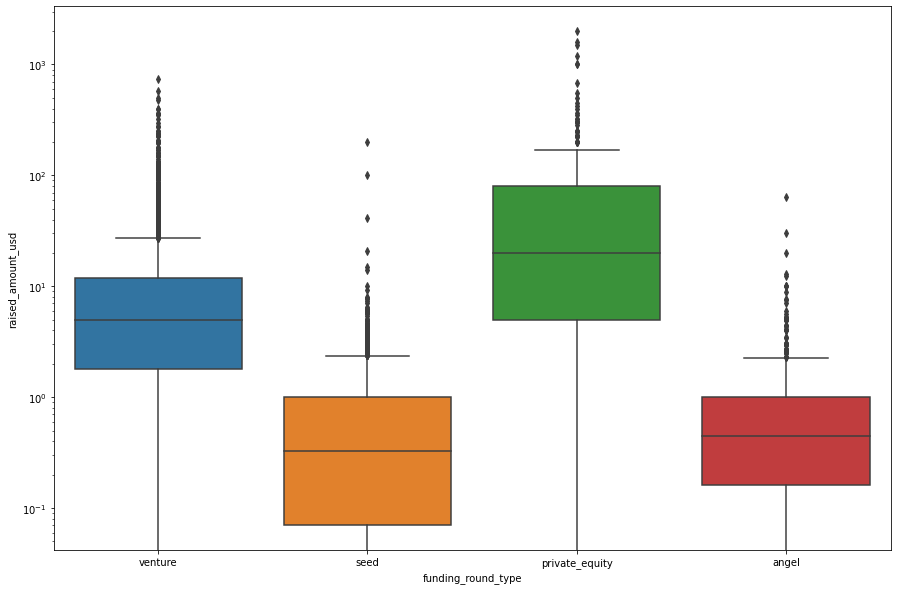

In [167]:
plt.figure(figsize=(15, 10))

sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = map_data )
# comparing summary stats across four categories
plt.yscale('log')
plt.show()

### Checkpoint 3 - Goal 2 , Country Analysis


In [168]:
# Filter the funding_round_type for the most representative type i.e, venture
main_frame = main_frame[main_frame.funding_round_type == "venture"]

In [169]:
# Let's look at the country data and it's type
main_frame.dtypes

key_0                       object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [170]:
main_frame.country_code

0        IND
4        CHN
8        CAN
10       USA
11       USA
        ... 
23997    USA
23998    USA
23999    USA
24000    USA
24001    USA
Name: country_code, Length: 10658, dtype: object

In [171]:
main_frame.reset_index()

,index,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
1,4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
2,8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
3,10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA
4,11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...,...,...
10653,23997,/ORGANIZATION/COURSERA,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
10654,23998,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
10655,23999,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
10656,24000,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA


In [172]:
main_frame.country_code

0        IND
4        CHN
8        CAN
10       USA
11       USA
        ... 
23997    USA
23998    USA
23999    USA
24000    USA
24001    USA
Name: country_code, Length: 10658, dtype: object

In [173]:
# Change the dtype of country_code to str
main_frame.country_code = main_frame.country_code.astype('str')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [174]:
main_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)[:9]

country_code
USA    8.991502e+10
CHN    7.286008e+09
GBR    3.706209e+09
IND    2.845473e+09
CAN    1.683395e+09
ISR    1.608037e+09
DEU    1.497472e+09
FRA    1.386411e+09
CHE    8.390552e+08
Name: raised_amount_usd, dtype: float64

In [175]:
# From the website provided and the above data top 3 english speaking countries are USA , GBR and IND


##### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

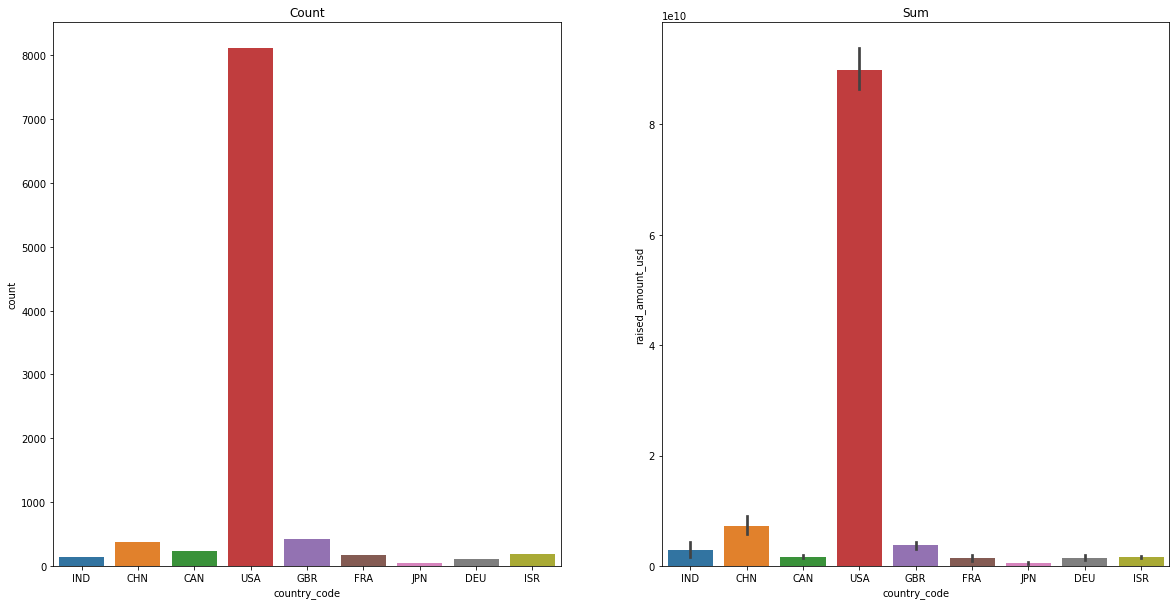

In [249]:
countries = main_frame[main_frame.country_code.isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=countries)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=countries, estimator=sum)
plt.title("Sum")
plt.show()

### Checkpoint 4 - Goal 3 , Sector Analysis one

In [177]:
# Let's look into the mapping data
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [178]:
# Let's check for null data
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [179]:
# Let's remove one row which contains the null value
mapping = mapping[mapping.isnull().sum(axis = 1)==0]

In [180]:
# Let's check for null data again
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [181]:
# Let's Introduce a new function melt
# melt function will merge the multiple columns into two columns variables and values, lets see how
columns_to_be_melted = mapping.columns[1:]
column_to_be_seperated = np.setdiff1d(mapping.columns, columns_to_be_melted) # We need to merge all sectors apart from category list so exclude that column


In [182]:
melted_mapping = pd.melt(mapping, 
        id_vars=list(column_to_be_seperated), 
        value_vars=list(columns_to_be_melted))

In [183]:
# lets look at the new dataset
melted_mapping

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [184]:
# We can see that all the various columns are merged into a column name variable and it's value is assigned to a column name value
# Let's check for the values column
melted_mapping.value.value_counts()

0    5496
1     687
Name: value, dtype: int64

In [185]:
# Here we can find that only 687 rows of data is only useful to us so removing the remaining we have
melted_mapping = melted_mapping[melted_mapping.value != 0].reset_index()

In [186]:
# convert the melted_mapping data to upper case
melted_mapping.variable = melted_mapping.variable.apply(lambda x: x.upper())
melted_mapping.category_list = melted_mapping.category_list.apply(lambda x: x.upper())


In [187]:
# Let's observe the Category List
melted_mapping.category_list.sort_values()

61                  0NOTECHNOLOGY
62     0TURAL LANGUAGE PROCESSING
63               0TURAL RESOURCES
319                     0VIGATION
227                            3D
                  ...            
531                     WHOLESALE
162              WINE AND SPIRITS
163                      WIRELESS
532                         WOMEN
533                  YOUNG ADULTS
Name: category_list, Length: 687, dtype: object

In [188]:
# We can observe that 0NOTECHNOLOGY is not a word and simillarly 0VIGATION is also not a word
# if we notice that , we can see that NA is by mistake replaced with 0 
# So we will replace 0 with NA
# Also we will see that if there is any other value will not be affected by replacing 0 to NA so let's have a look on the category_list where 0 is present
melted_mapping[melted_mapping.category_list.str.contains('0')]

,index,category_list,variable,value
44,1613,ENERGY MA0GEMENT,CLEANTECH / SEMICONDUCTORS,1
61,1844,0NOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS,1
62,1845,0TURAL LANGUAGE PROCESSING,CLEANTECH / SEMICONDUCTORS,1
63,1846,0TURAL RESOURCES,CLEANTECH / SEMICONDUCTORS,1
71,2045,WASTE MA0GEMENT,CLEANTECH / SEMICONDUCTORS,1
98,2258,DIGITAL RIGHTS MA0GEMENT,ENTERTAINMENT,1
99,2259,DIGITAL SIG0GE,ENTERTAINMENT,1
102,2283,EDUCATIO0L GAMES,ENTERTAINMENT,1
106,2316,EVENT MA0GEMENT,ENTERTAINMENT,1
165,2767,ALTER0TIVE MEDICINE,HEALTH,1


In [189]:
# Here ENTERPRISE 2.0 is data that is present here with 0 if we replace 0 to NA so when we replace the data we have
# new data with ENTERPRISE 2.NA , so we will again change 2.NA to 0

melted_mapping.category_list = melted_mapping.category_list.apply(lambda x : x.replace('0','NA'))
melted_mapping.category_list = melted_mapping.category_list.apply(lambda x : x.replace('2.NA','2.0'))

In [190]:
# Now let's look the same data again
melted_mapping[(melted_mapping.category_list.str.contains('0'))|(melted_mapping.category_list.str.contains('NA'))]

,index,category_list,variable,value
44,1613,ENERGY MANAGEMENT,CLEANTECH / SEMICONDUCTORS,1
61,1844,NANOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS,1
62,1845,NATURAL LANGUAGE PROCESSING,CLEANTECH / SEMICONDUCTORS,1
63,1846,NATURAL RESOURCES,CLEANTECH / SEMICONDUCTORS,1
71,2045,WASTE MANAGEMENT,CLEANTECH / SEMICONDUCTORS,1
98,2258,DIGITAL RIGHTS MANAGEMENT,ENTERTAINMENT,1
99,2259,DIGITAL SIGNAGE,ENTERTAINMENT,1
102,2283,EDUCATIONAL GAMES,ENTERTAINMENT,1
106,2316,EVENT MANAGEMENT,ENTERTAINMENT,1
165,2767,ALTERNATIVE MEDICINE,HEALTH,1


In [191]:
melted_mapping

,index,category_list,variable,value
0,7,ADVENTURE TRAVEL,AUTOMOTIVE & SPORTS,1
1,13,AEROSPACE,AUTOMOTIVE & SPORTS,1
2,44,AUTO,AUTOMOTIVE & SPORTS,1
3,45,AUTOMATED KIOSK,AUTOMOTIVE & SPORTS,1
4,46,AUTOMOTIVE,AUTOMOTIVE & SPORTS,1
...,...,...,...,...
682,6112,SOCIAL RECRUITING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1
683,6113,SOCIAL TELEVISION,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1
684,6114,SOCIAL TRAVEL,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1
685,6125,STOCK EXCHANGES,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1


In [192]:
# Now we are ok with the data
# For our purpose we don't want the column value so will drop the value column and also rename the variable to main_sector
melted_mapping = melted_mapping.drop(['value'], axis=1)
melted_mapping = melted_mapping.rename(columns={'variable':'main_sector'})

In [193]:
# Now let's check the data again
melted_mapping

,index,category_list,main_sector
0,7,ADVENTURE TRAVEL,AUTOMOTIVE & SPORTS
1,13,AEROSPACE,AUTOMOTIVE & SPORTS
2,44,AUTO,AUTOMOTIVE & SPORTS
3,45,AUTOMATED KIOSK,AUTOMOTIVE & SPORTS
4,46,AUTOMOTIVE,AUTOMOTIVE & SPORTS
...,...,...,...
682,6112,SOCIAL RECRUITING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
683,6113,SOCIAL TELEVISION,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
684,6114,SOCIAL TRAVEL,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
685,6125,STOCK EXCHANGES,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"


In [194]:
# Now let's look into the main_frame category_list data
main_frame.category_list

0                   Media
4             Curated Web
8           Biotechnology
10              Analytics
11              Analytics
               ...       
23997    EdTech|Education
23998    EdTech|Education
23999    EdTech|Education
24000    EdTech|Education
24001    EdTech|Education
Name: category_list, Length: 10658, dtype: object

In [195]:
# Let's convert main_frame category_list data to upper case
main_frame.category_list = main_frame.category_list.apply(lambda x: x.upper())

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [196]:
# Looking into the data again
main_frame.reset_index()

,index,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND
1,4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN
2,8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN
3,10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA
4,11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA
...,...,...,...,...,...,...,...,...,...,...,...
10653,23997,/ORGANIZATION/COURSERA,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA
10654,23998,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA
10655,23999,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA
10656,24000,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA


In [197]:
# Remove column key_0 as it is duplicate of permalink
main_frame = main_frame.drop('key_0', axis=1)


In [198]:
# Create a primary sector from the category list
main_frame['primary_sector'] = main_frame.category_list.apply(lambda x : x.split('|')[0])

In [199]:
# Let's see the updated main_frame
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS
...,...,...,...,...,...,...,...,...,...,...
23997,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH
23998,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH
23999,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH
24000,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH


In [200]:
# Now concat the data from melted_mapping
main_frame = main_frame.merge(melted_mapping, how="left" , left_on= "primary_sector", right_on="category_list")

In [201]:
# Our data looks like below 
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,index,category_list_y,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA,2494.0,MEDIA,ENTERTAINMENT
1,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB,4289.0,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
2,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY,1439.0,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
3,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,5517.0,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
4,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,5517.0,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10653,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,5029.0,EDTECH,OTHERS
10654,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,5029.0,EDTECH,OTHERS
10655,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,5029.0,EDTECH,OTHERS
10656,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,5029.0,EDTECH,OTHERS


In [202]:
# After looking into the data_set we can see that there are multiple columns that need to be deleted, so dropping the unwanted columns
main_frame = main_frame.drop(['index',	'category_list_y'], axis=1)


In [203]:
# Rename category_list_x to category_list
main_frame = main_frame.rename(columns={'category_list_x':'category_list'})

In [204]:
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA,ENTERTAINMENT
1,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
2,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
3,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
4,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
...,...,...,...,...,...,...,...,...,...,...,...
10653,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10654,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10655,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10656,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS


##### Now we have all the main_sector and primary_sector so sector analysis part one is completed here

### Checkpoint 5 - Goal 3 , Sector Analysis two

In [205]:
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA,ENTERTAINMENT
1,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
2,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
3,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
4,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
...,...,...,...,...,...,...,...,...,...,...,...
10653,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10654,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10655,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10656,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS


In [206]:
# Create three different data_sets for IND, GBR and IND (We had three top countries) with filter of 
D1 = main_frame[(main_frame.country_code == 'USA') & (main_frame.raised_amount_usd <= 15000000) & (main_frame.raised_amount_usd >= 5000000)]

In [207]:
round(D1.raised_amount_usd.describe(),2)

count        2788.00
mean      8995178.36
std       3054548.37
min       5000000.00
25%       6211437.50
50%       8500000.00
75%      11110937.00
max      15000000.00
Name: raised_amount_usd, dtype: float64

In [208]:
D2 = main_frame[(main_frame.country_code == 'GBR') & (main_frame.raised_amount_usd <= 15000000) & (main_frame.raised_amount_usd >= 5000000)]
round(D2.raised_amount_usd.describe(),2)

count         125.00
mean      8458292.15
std       2616208.00
min       5000000.00
25%       6283402.00
50%       8000000.00
75%      10000000.00
max      15000000.00
Name: raised_amount_usd, dtype: float64

In [209]:
D3 = main_frame[(main_frame.country_code == 'IND') & (main_frame.raised_amount_usd <= 15000000) & (main_frame.raised_amount_usd >= 5000000)]
round(D3.raised_amount_usd.describe(),2)

count          66.00
mean      8426204.65
std       3259007.83
min       5000000.00
25%       5805000.00
50%       7500000.00
75%      10000000.00
max      15000000.00
Name: raised_amount_usd, dtype: float64

In [210]:
# Adding count and sum of Raised_amount_usd in all data_Sets D1,D2,D3

# Get sum and count of USA data_Set
usa_count = D1.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum']).sort_values(by = 'count', ascending = False)


In [211]:
# Get sum and count of GBR data_Set

gbr_count = D2.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum']).sort_values(by = 'count', ascending = False)


In [212]:
# Get sum and count of IND data_Set

ind_count = D3.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum']).sort_values(by = 'count', ascending = False)

In [213]:
# Merging all sum and count of top three countries to their respective data set
D1 = D1.merge(usa_count, how="left" , on= "main_sector")
D2 = D2.merge(gbr_count, how="left" , on= "main_sector")
D3 = D3.merge(ind_count, how="left" , on= "main_sector")

In [214]:
D1

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
0,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",572,5.083190e+09
1,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,APPS|CABLE|DISTRIBUTION|SOFTWARE,acquired,USA,APPS,"NEWS, SEARCH AND MESSAGING",345,2.940774e+09
2,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,SERVICE PROVIDERS|TECHNOLOGY,operating,USA,SERVICE PROVIDERS,OTHERS,692,6.243287e+09
3,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,MANUFACTURING,operating,USA,MANUFACTURING,MANUFACTURING,159,1.459685e+09
4,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,MANUFACTURING,operating,USA,MANUFACTURING,MANUFACTURING,159,1.459685e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,/funding-round/8288cb336fb2da2aa08cadc7cd0bf060,venture,29-01-2003,9000000.0,/ORGANIZATION/COURION-CORPORATION,Courion Corporation,SOFTWARE,operating,USA,SOFTWARE,OTHERS,692,6.243287e+09
2784,/funding-round/263509cb6421ac6806447ffdebeba081,venture,11-11-2014,15000000.0,/ORGANIZATION/COURSE-HERO,Course Hero,CROWDSOURCING|EDUCATION|MARKETPLACES,operating,USA,CROWDSOURCING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",572,5.083190e+09
2785,/funding-round/453f6e63bf59355a3e39d1275f250383,venture,05-09-2006,12000000.0,/ORGANIZATION/COURSEADVISOR,CourseAdvisor,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS,692,6.243287e+09
2786,/funding-round/3ec44b3866f1f6c6b504768711b49314,venture,17-07-2012,6000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS,692,6.243287e+09


In [215]:
# Let's look into the data
D1.sort_values(by = ['count','sum'], ascending=False)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
2,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,SERVICE PROVIDERS|TECHNOLOGY,operating,USA,SERVICE PROVIDERS,OTHERS,692,6.243287e+09
8,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,/ORGANIZATION/170-SYSTEMS,170 Systems,SOFTWARE,acquired,USA,SOFTWARE,OTHERS,692,6.243287e+09
9,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,/ORGANIZATION/17ZUOYE,17zuoye,EDUCATION|LANGUAGE LEARNING,operating,USA,EDUCATION,OTHERS,692,6.243287e+09
10,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,/ORGANIZATION/17ZUOYE,17zuoye,EDUCATION|LANGUAGE LEARNING,operating,USA,EDUCATION,OTHERS,692,6.243287e+09
12,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,/ORGANIZATION/1STDIBS,1stdibs,E-COMMERCE,operating,USA,E-COMMERCE,OTHERS,692,6.243287e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,/funding-round/7e2b3f5858cc3d9e6b397adade04cc5a,venture,01-01-2007,10000000.0,/ORGANIZATION/CITIZEN-SPORTS,Citizen Sports,SPORTS,acquired,USA,SPORTS,AUTOMOTIVE & SPORTS,30,2.813935e+08
2361,/funding-round/adc4e173bcd088bb1f04311512ad0834,venture,29-01-2014,8762152.0,/ORGANIZATION/CLEAN-WAVE-TECHNOLOGIES,Clean Wave Technologies,ELECTRIC VEHICLES|ENERGY MANAGEMENT,operating,USA,ELECTRIC VEHICLES,AUTOMOTIVE & SPORTS,30,2.813935e+08
2445,/funding-round/afc318f25198de4c677f1df140f357e2,venture,27-07-2010,12311441.0,/ORGANIZATION/CLOUDMADE,CloudMade,AUTOMOTIVE|IPHONE|LOCATION BASED SERVICES|MACH...,operating,USA,AUTOMOTIVE,AUTOMOTIVE & SPORTS,30,2.813935e+08
2485,/funding-round/360f1a5fa7c2c5f61ea0ceabcc12f5b4,venture,21-11-2013,6700000.0,/ORGANIZATION/COACHUP,CoachUp,SPORTS|TRAINING,operating,USA,SPORTS,AUTOMOTIVE & SPORTS,30,2.813935e+08


In [216]:
D2.sort_values(by = ['count','sum'], ascending=False)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
0,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/ORGANIZATION/365SCORES,365Scores,ANDROID|APPS|IPHONE|MOBILE|SPORTS,operating,GBR,ANDROID,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",31,253731645.0
8,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10720178.0,/ORGANIZATION/ACAL-ENTERPRISE-SOLUTIONS,Acal Enterprise Solutions,INFORMATION TECHNOLOGY,operating,GBR,INFORMATION TECHNOLOGY,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",31,253731645.0
14,/funding-round/71f1b5903874817292d67e1ac6aa66b2,venture,11-03-2014,7500000.0,/ORGANIZATION/ADBRAIN,Adbrain,ADVERTISING|ENTERPRISE SOFTWARE|MARKETING AUTO...,operating,GBR,ADVERTISING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",31,253731645.0
15,/funding-round/5bcca548aeccd5acdea0d0edb086db8d,venture,07-05-2014,6772812.0,/ORGANIZATION/ADINSIGHT,ResponseTap,ADVERTISING|ENTERPRISE SOFTWARE|SAAS,operating,GBR,ADVERTISING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",31,253731645.0
16,/funding-round/83653befbf3c473ec97a1617479448c8,venture,01-03-2008,6500000.0,/ORGANIZATION/ADJUG,Adjug,ADVERTISING|INTERNET|MARKETPLACES|PUBLISHING,acquired,GBR,ADVERTISING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",31,253731645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,/funding-round/a4d5080cbda34c2ef4295d8fbe4e9ad5,venture,01-04-2008,11911764.0,/ORGANIZATION/AUTOQUAKE,Autoquake,AUTOMOTIVE|CARS|E-COMMERCE|INSURANCE|INTERNET|...,acquired,GBR,AUTOMOTIVE,AUTOMOTIVE & SPORTS,6,47920470.0
102,/funding-round/76b8bfeb7ef05fb7c0be2b9a70e7d2ed,venture,14-12-2014,7230241.0,/ORGANIZATION/CARWOW,Carwow,AUTOMOTIVE|CONSUMER INTERNET|CURATED WEB,operating,GBR,AUTOMOTIVE,AUTOMOTIVE & SPORTS,6,47920470.0
114,/funding-round/7cd25bca401de5477ff2a79f31209406,venture,14-07-2014,5133089.0,/ORGANIZATION/CHARGEMASTER,Chargemaster,AUTOMOTIVE|ELECTRIC VEHICLES|INFRASTRUCTURE,operating,GBR,AUTOMOTIVE,AUTOMOTIVE & SPORTS,6,47920470.0
11,/funding-round/dee5892854258f2cd7cf0ec144080ca1,venture,15-09-2011,6321095.0,/ORGANIZATION/ACCUNOSTICS,AccuNostics,HEALTH CARE|HEALTH DIAGNOSTICS,operating,GBR,HEALTH CARE,HEALTH,2,12185607.0


In [217]:
D3.sort_values(by = ['count','sum'], ascending=False)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
1,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,E-COMMERCE,operating,IND,E-COMMERCE,OTHERS,24,213169507.0
7,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,5000000.0,/ORGANIZATION/AMEYO,Ameyo,SOFTWARE,operating,IND,SOFTWARE,OTHERS,24,213169507.0
13,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,29-06-2006,10000000.0,/ORGANIZATION/APPLABS,AppLabs,SOFTWARE,acquired,IND,SOFTWARE,OTHERS,24,213169507.0
14,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,10-04-2014,5000000.0,/ORGANIZATION/APPSDAILY-SOLUTIONS,Appsdaily Solutions,SOFTWARE,operating,IND,SOFTWARE,OTHERS,24,213169507.0
15,/funding-round/2a3a5fb06cd92186431fbe8fb6dfd23b,venture,24-01-2014,12000000.0,/ORGANIZATION/ARIISTO,Ariisto,REAL ESTATE,operating,IND,REAL ESTATE,OTHERS,24,213169507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,29-05-2015,12000000.0,/ORGANIZATION/ATHER-ENERGY,Ather Energy,AUTOMOTIVE|ELECTRIC VEHICLES,operating,IND,AUTOMOTIVE,AUTOMOTIVE & SPORTS,3,32000000.0
42,/funding-round/3875ae874b0511ede2f7d8597e0d126f,venture,27-11-2013,15000000.0,/ORGANIZATION/CARDEKHO,Cardekho,AUTOMOTIVE|CARS|ONLINE SHOPPING,operating,IND,AUTOMOTIVE,AUTOMOTIVE & SPORTS,3,32000000.0
27,/funding-round/9725f0dc5dc4bf295cd047b4887a10f5,venture,23-02-2015,9600000.0,/ORGANIZATION/BAKERS-CIRCLE,Bakers Circle,FOOD PROCESSING,operating,IND,FOOD PROCESSING,MANUFACTURING,2,19600000.0
47,/funding-round/d40413cd302a9501f87ebcc648675295,venture,16-09-2015,10000000.0,/ORGANIZATION/CHAI-POINT,Chai Point,FOOD PROCESSING,operating,IND,FOOD PROCESSING,MANUFACTURING,2,19600000.0


In [218]:
usa_count

count           sum
country_code main_sector                                                 
USA          OTHERS                                     692  6.243287e+09
             CLEANTECH / SEMICONDUCTORS                 683  6.313173e+09
             SOCIAL, FINANCE, ANALYTICS, ADVERTISING    572  5.083190e+09
             NEWS, SEARCH AND MESSAGING                 345  2.940774e+09
             HEALTH                                     217  1.997242e+09
             MANUFACTURING                              159  1.459685e+09
             ENTERTAINMENT                               90  7.598135e+08
             AUTOMOTIVE & SPORTS                         30  2.813935e+08

In [219]:
# Getting the top country name from companies from all data
D1[(D1.main_sector == "OTHERS")].groupby([D1.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
Capella Photonics          54968051.0
AirTight Networks          54201907.0
Black Duck Software        51000000.0
Approva                    50100000.0
Bit9                       48433533.0
                              ...    
Breezeworks                 5000000.0
Boxbee, Inc.                5000000.0
Bottomline Technologies     5000000.0
Carlotz                     5000000.0
Clique Intelligence         5000000.0
Name: raised_amount_usd, Length: 468, dtype: float64

In [240]:
D1[(D1.main_sector == "SOCIAL, FINANCE, ANALYTICS, ADVERTISING")].groupby([D1.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
ChoiceStream           58300000.0
ChaCha                 53000000.0
4INFO                  40000000.0
Aggregate Knowledge    39958350.0
BlackArrow             39763076.0
                          ...    
Banjo                   5000000.0
Batanga Media           5000000.0
Adea                    5000000.0
Becovillage             5000000.0
Celtra Inc.             5000000.0
Name: raised_amount_usd, Length: 398, dtype: float64

In [241]:
gbr_count

count          sum
country_code main_sector                                                
GBR          SOCIAL, FINANCE, ANALYTICS, ADVERTISING     31  253731645.0
             OTHERS                                      28  251194320.0
             CLEANTECH / SEMICONDUCTORS                  27  218222170.0
             ENTERTAINMENT                               12  108659268.0
             NEWS, SEARCH AND MESSAGING                  11   93197131.0
             MANUFACTURING                                8   72175908.0
             AUTOMOTIVE & SPORTS                          6   47920470.0
             HEALTH                                       2   12185607.0

In [242]:
D2[(D2.main_sector == "OTHERS")].groupby([D2.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
ACS Clothing                    26239014.0
Alfresco                        21000000.0
Aepona                          20000000.0
Cambridge Broadband Networks    16500000.0
Azure Solutions                 15000000.0
Celona Technologies             14000000.0
BathEmpire                      12879637.0
Bathrooms.com                   12060066.0
APSU                            11200000.0
BIZZBY                          10000000.0
ChemistDirect                   10000000.0
Xplornet                        10000000.0
AOMi                             7576257.0
Peak                             7000000.0
Busuu                            6700000.0
Antenna Software                 6374457.0
Bluebell Telecom                 6124490.0
Blackbay                         6110000.0
Barburrito                       6022987.0
Biometric Security               5500000.0
Clarisite                        5500000.0
Almondy                          5407412.0
Bacula Systems                   5000000.0
BullGu

In [243]:
D2[(D2.main_sector == "SOCIAL, FINANCE, ANALYTICS, ADVERTISING")].groupby([D2.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
Celltick Technologies        37500000.0
Amplience                    24200000.0
Coco Communications          15047666.0
Captify                      12597433.0
Borro                        12072758.0
Bigballs Media               10731588.0
Acal Enterprise Solutions    10720178.0
Aveillant                    10334077.0
AXSionics                     9780000.0
ARKeX                         8860386.0
Artesian Solutions            8000000.0
CertiVox                      8000000.0
Adbrain                       7500000.0
Appear Here                   7500000.0
byyd                          7500000.0
Citel Technologies            7000000.0
ATG Media (The Saleroom)      6963750.0
ResponseTap                   6772812.0
Adjug                         6500000.0
Bigstep.com                   6500000.0
Ancoa Software                6367595.0
Ayondo                        6283402.0
Brandwatch                    6000000.0
aiHit                         5500000.0
365Scores                     55000

In [244]:
ind_count

count          sum
country_code main_sector                                                
IND          OTHERS                                      24  213169507.0
             CLEANTECH / SEMICONDUCTORS                  10   84380000.0
             SOCIAL, FINANCE, ANALYTICS, ADVERTISING     10   79650000.0
             ENTERTAINMENT                                9   68080000.0
             NEWS, SEARCH AND MESSAGING                   7   52750000.0
             AUTOMOTIVE & SPORTS                          3   32000000.0
             MANUFACTURING                                2   19600000.0
             HEALTH                                       1    6500000.0

In [245]:
D3[D3.main_sector == "OTHERS"].groupby(D3.name)['raised_amount_usd'].count().sort_values(ascending = False)

name
CommonFloor                      3
Comat Technologies               2
CaratLane                        2
beStylish.com                    1
CE Info Systems                  1
Ameyo                            1
AppLabs                          1
Appsdaily Solutions              1
Ariisto                          1
Aujas Networks                   1
Azure Hospitality                1
CarWale                          1
Canvera Digital Technologies     1
Cooptions Technologies           1
Casa Grande                      1
Citrus Payment                   1
Classteacher Learning Systems    1
ConnectM Technology Solutions    1
Conquest                         1
21Diamonds                       1
Name: raised_amount_usd, dtype: int64

In [246]:
D3[D3.main_sector == "SOCIAL, FINANCE, ANALYTICS, ADVERTISING"].groupby(D3.name)['raised_amount_usd'].count().sort_values(ascending = False)

name
BankBazaar.com           2
authorSTREAM.com         1
Capital Float            1
ApnaPaisa                1
Annapurna Microfinace    1
Amagi Media Labs         1
Akosha                   1
Agile                    1
A LITTLE WORLD           1
Name: raised_amount_usd, dtype: int64

##### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [234]:
countries

,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...,...
23997,/ORGANIZATION/COURSERA,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
23998,/ORGANIZATION/COURSERA,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
23999,/ORGANIZATION/COURSERA,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA
24000,/ORGANIZATION/COURSERA,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EdTech|Education,operating,USA


In [250]:
top_three_countries = countries[countries.country_code.isin(['USA','GBR','IND'])]
top_three_countries

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA,ENTERTAINMENT
3,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
4,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
5,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
6,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,APPS|CABLE|DISTRIBUTION|SOFTWARE,acquired,USA,APPS,"NEWS, SEARCH AND MESSAGING"
...,...,...,...,...,...,...,...,...,...,...,...
10653,/funding-round/72d440be1e4243621dc27917b915014f,venture,24-11-2013,20000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10654,/funding-round/940ccd2af289cc3c55b73ffb7d06af20,venture,25-08-2015,49500000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10655,/funding-round/a8d4b3a013821a604e913381227174da,venture,27-10-2015,11600000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS
10656,/funding-round/b41f97408dadc37bf8a24bb13ada3686,venture,10-07-2013,43000000.0,/ORGANIZATION/COURSERA,Coursera,EDTECH|EDUCATION,operating,USA,EDTECH,OTHERS


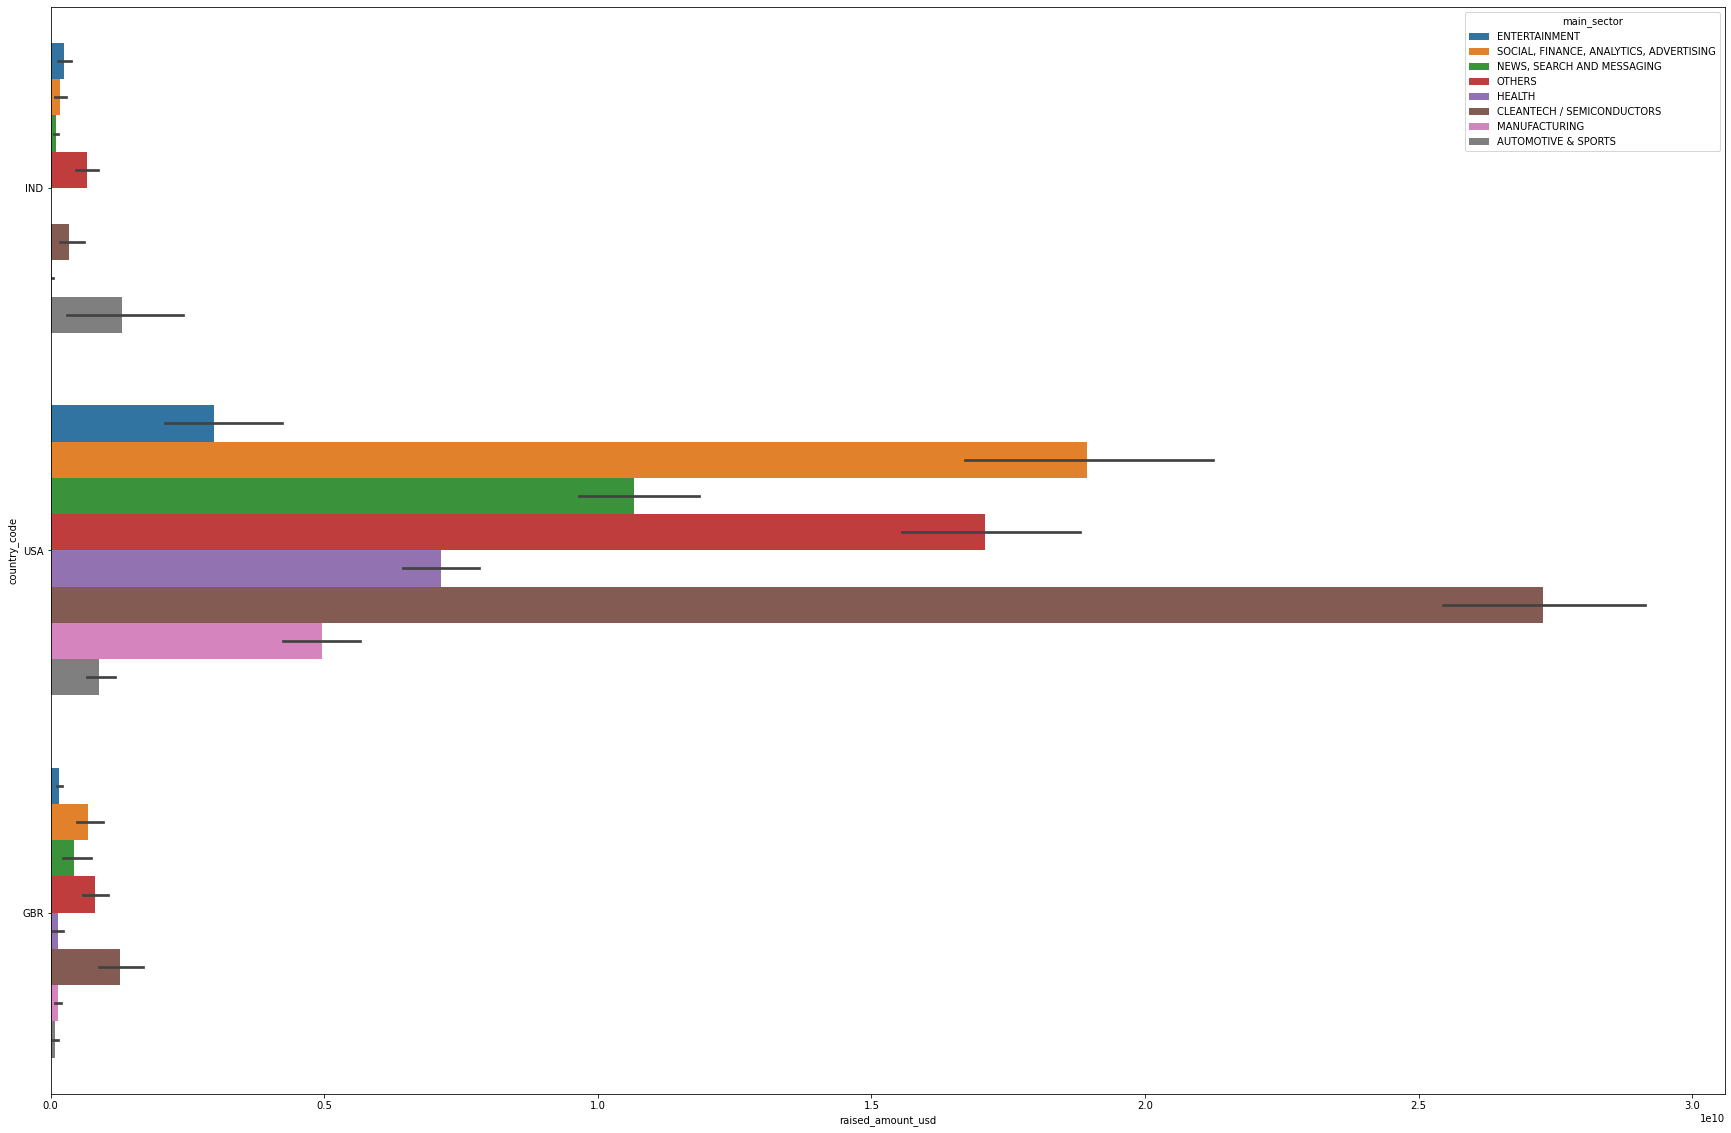

In [251]:
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=top_three_countries, estimator=np.sum)
plt.show()

### Thank you